In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def float2int(num):
    try:
        return int(num)
    except:
        return -1

In [12]:
charges = pd.read_excel("./Priority3-MaxChargesDispositions-Full.xlsx", usecols=['Client_ID', 'max_charge_grid_level'], index_col='Client_ID')
charges.head()

,max_charge_grid_level
Client_ID,
35,2
46,4
46,2
46,2
46,1


In [13]:
charges['max_charge_grid_level'] = charges.max_charge_grid_level.apply(float2int)

In [14]:
charges.head()

,max_charge_grid_level
Client_ID,
35,2
46,4
46,2
46,2
46,1


In [15]:
len(charges)

41673

In [16]:
demographic = pd.read_excel("DemographicData.xlsx", usecols=['PERSON_ID', 'RACE_ID'], index_col ="PERSON_ID")
demographic.head()

,RACE_ID
PERSON_ID,
12,6.0
35,1.0
46,4.0
46,4.0
70,2.0


In [49]:
set(demographic['RACE_ID'])

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [17]:
demographic['RACE_ID'] = demographic.RACE_ID.apply(float2int)

In [18]:
demographic.head()

,RACE_ID
PERSON_ID,
12,6
35,1
46,4
46,4
70,2


In [19]:
len(demographic)

25708

In [31]:
result = pd.merge(charges, demographic, left_index=True, right_index=True)
result.head()

,max_charge_grid_level,RACE_ID
35,2,1
35,2,1
35,2,1
35,2,1
35,2,1


In [32]:
len(result)

179570

In [67]:
clients = set(result.index.values)

In [68]:
len(clients)

11573

In [103]:
def race_distribution():
    race_dist = []
    for client in clients:
        try:
            client_race = demographic.at[client, 'RACE_ID'].values[0]
        except:
            client_race = demographic.at[client, 'RACE_ID']
        if client_race > 0 and client_race < 8:
            race_dist.append(client_race)
    return race_dist

In [104]:
race_dist = race_distribution()

<BarContainer object of 7 artists>

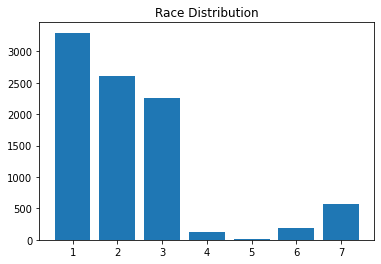

In [105]:
plt.title('Race Distribution') 
plt.bar(*np.unique(race_dist, return_counts=True))

In [82]:
def charge_distribution_by_race(race):
    charge_distribution = [0, 0, 0, 0, 0, 0, 0]
    charges_level = []
    
    for client in clients:
        try:
            client_race = demographic.at[client, 'RACE_ID'].values[0]
        except:
            client_race = demographic.at[client, 'RACE_ID']
        if client_race == race:
            try:
                charge_level = max(charges.at[client, 'max_charge_grid_level'].values)
            except:
                charge_level = charges.at[client, 'max_charge_grid_level']
            if charge_level > 0:
                charges_level.append(charge_level)
                charge_distribution[charge_level-1] += 1

    return charge_distribution, charges_level

In [83]:
def avg_charge_level(race_charge_list):
    sum_clients = sum(race_charge_list)
    sum_charge_level = 0
    for i in range(len(race_charge_list)):
        sum_charge_level += (i+1) * race_charge_list[i]
    return sum_clients, sum_charge_level/sum_clients

In [245]:
charge_distribution_of_race1, charges1 = charge_distribution_by_race(1)
print(charge_distribution_of_race1)

[388, 1408, 774, 382, 116, 59, 2]


In [260]:
print(avg_charge_level(charge_distribution_of_race1))
# sum_clients, avg_charge_level

(3129, 2.5573665707893896)


<BarContainer object of 7 artists>

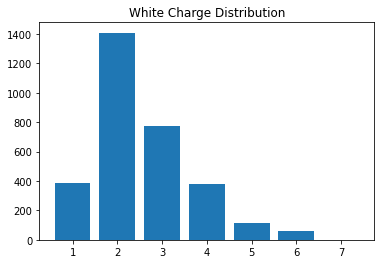

In [252]:
plt.title('White Charge Distribution') 
plt.bar(*np.unique(charges1, return_counts=True))

In [247]:
charge_distribution_of_race2, charges2 = charge_distribution_by_race(2)
print(charge_distribution_of_race2)

[220, 931, 731, 389, 200, 41, 10]


In [261]:
print(avg_charge_level(charge_distribution_of_race2))

(2522, 2.8338620142743856)


<BarContainer object of 7 artists>

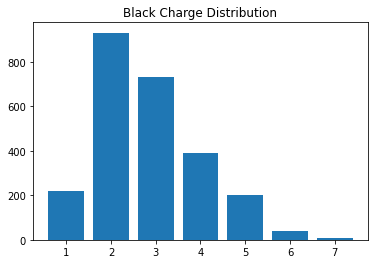

In [253]:
plt.title('Black Charge Distribution') 
plt.bar(*np.unique(charges2, return_counts=True))

In [248]:
charge_distribution_of_race3, charges3 = charge_distribution_by_race(3)
print(charge_distribution_of_race3)

[247, 846, 609, 285, 130, 42, 3]


In [262]:
print(avg_charge_level(charge_distribution_of_race3))

(2162, 2.696114708603145)


<BarContainer object of 7 artists>

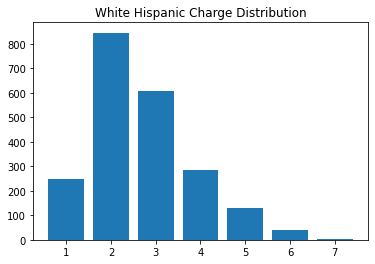

In [254]:
plt.title('White Hispanic Charge Distribution') 
plt.bar(*np.unique(charges3, return_counts=True))

In [249]:
charge_distribution_of_race4, charges4 = charge_distribution_by_race(4)
print(charge_distribution_of_race4)

[16, 40, 29, 19, 7, 1, 2]


In [263]:
print(avg_charge_level(charge_distribution_of_race4))

(114, 2.754385964912281)


<BarContainer object of 7 artists>

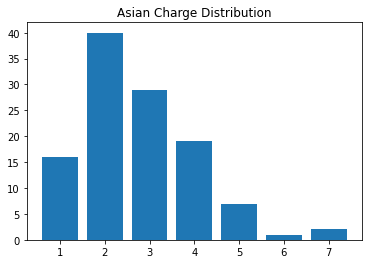

In [255]:
plt.title('Asian Charge Distribution') 
plt.bar(*np.unique(charges4, return_counts=True))

In [250]:
charge_distribution_of_race5, charges5 = charge_distribution_by_race(5)
print(charge_distribution_of_race5)

[0, 4, 5, 2, 3, 1, 0]


In [264]:
print(avg_charge_level(charge_distribution_of_race5))

(15, 3.466666666666667)


<BarContainer object of 5 artists>

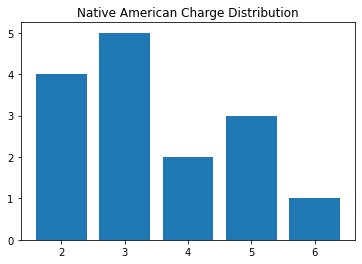

In [256]:
plt.title('Native American Charge Distribution') 
plt.bar(*np.unique(charges5, return_counts=True))

In [251]:
charge_distribution_of_race6, charges6 = charge_distribution_by_race(6)
print(charge_distribution_of_race6)

[19, 88, 45, 24, 7, 1, 0]


In [266]:
print(avg_charge_level(charge_distribution_of_race6))

(184, 2.5380434782608696)


<BarContainer object of 6 artists>

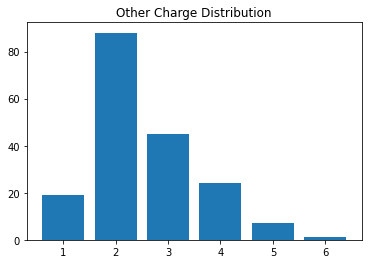

In [257]:
plt.title('Other Charge Distribution') 
plt.bar(*np.unique(charges6, return_counts=True))

In [84]:
charge_distribution_of_race7, charges7 = charge_distribution_by_race(7)
print(charge_distribution_of_race7)

[58, 194, 156, 79, 37, 13, 0]


In [85]:
print(avg_charge_level(charge_distribution_of_race7))

(537, 2.7802607076350094)


<BarContainer object of 6 artists>

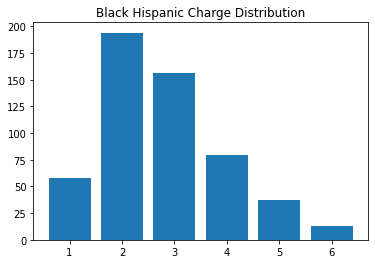

In [86]:
plt.title('Black Hispanic Charge Distribution') 
plt.bar(*np.unique(charges7, return_counts=True))

## charge_distribution_by_level

In [71]:
def charge_distribution_by_level(level):
    charge_distribution = [0, 0, 0, 0, 0, 0, 0] # White, Black, White Hispanic, Asian, Native American, Other, Black Hispanic
    charges_race = []

    for client in clients:
        try:
            client_level = max(charges.at[client, 'max_charge_grid_level'].values)
        except:
            client_level = charges.at[client, 'max_charge_grid_level']

        if client_level == level:
            try:
                client_race = demographic.at[client, 'RACE_ID'].values[0]
            except:
                client_race = demographic.at[client, 'RACE_ID']            
            if client_race > 0 and client_race < 8:
                charges_race.append(client_race)
                charge_distribution[client_race-1] += 1

    return charge_distribution, charges_race

<BarContainer object of 6 artists>

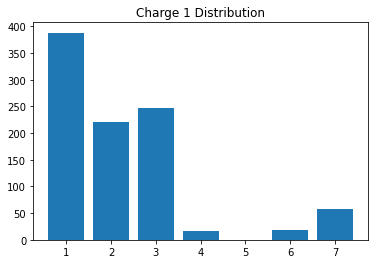

In [89]:
charge1_distribution, charges1_race = charge_distribution_by_level(1)
plt.title('Charge 1 Distribution') 
plt.bar(*np.unique(charges1_race, return_counts=True))

<BarContainer object of 7 artists>

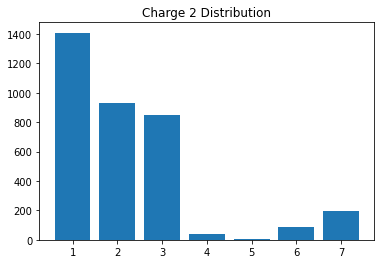

In [73]:
charge2_distribution, charges2_race = charge_distribution_by_level(2)
plt.title('Charge 2 Distribution') 
plt.bar(*np.unique(charges2_race, return_counts=True))

<BarContainer object of 7 artists>

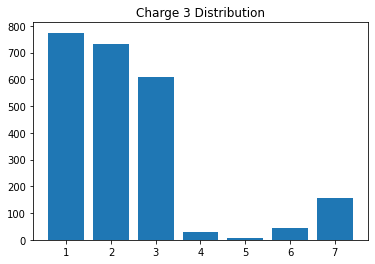

In [78]:
charge3_distribution, charges3_race = charge_distribution_by_level(3)
plt.title('Charge 3 Distribution') 
plt.bar(*np.unique(charges3_race, return_counts=True))

<BarContainer object of 7 artists>

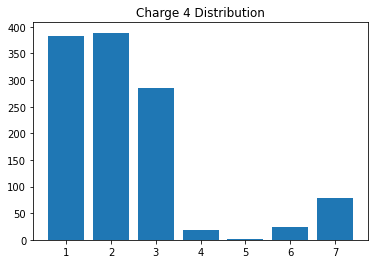

In [77]:
charge4_distribution, charges4_race = charge_distribution_by_level(4)
plt.title('Charge 4 Distribution') 
plt.bar(*np.unique(charges4_race, return_counts=True))

<BarContainer object of 7 artists>

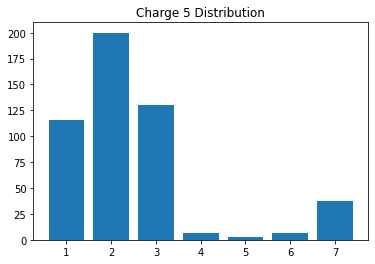

In [76]:
charge5_distribution, charges5_race = charge_distribution_by_level(5)
plt.title('Charge 5 Distribution') 
plt.bar(*np.unique(charges5_race, return_counts=True))

<BarContainer object of 7 artists>

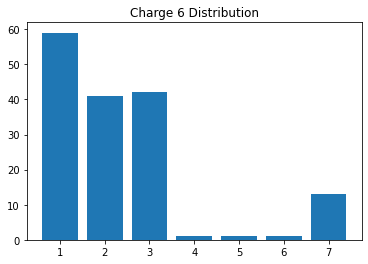

In [75]:
charge6_distribution, charges6_race = charge_distribution_by_level(6)
plt.title('Charge 6 Distribution') 
plt.bar(*np.unique(charges6_race, return_counts=True))